In [133]:
import pandas as pd

In [134]:
df = pd.read_csv("Mall_Customers.csv")

In [135]:
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [136]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

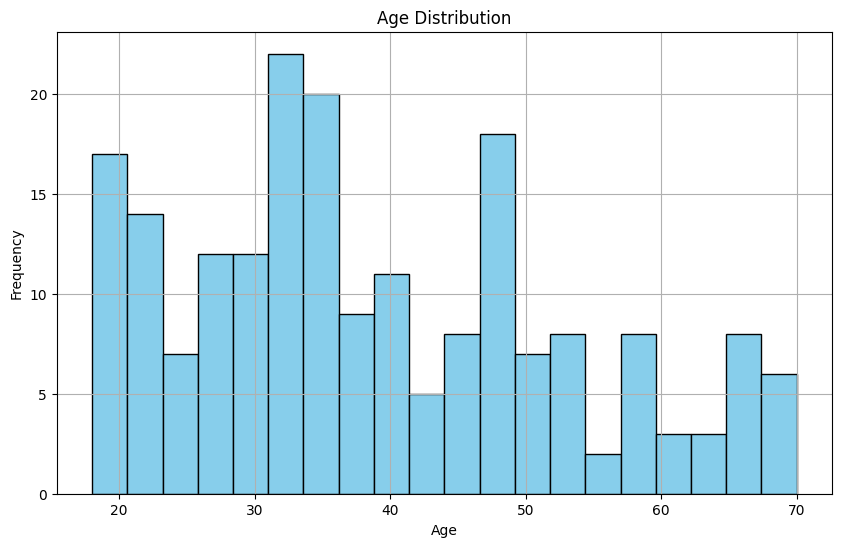

In [137]:
import matplotlib.pyplot as plt
ages = df['Age']
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [138]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

In [139]:
import numpy as np
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [140]:
from sklearn.cluster import KMeans 
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [141]:
df["Clus_km"] = labels
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Clus_km
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0


In [142]:
df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
Clus_km,,,,,
0,71.831579,0.378947,44.894737,48.705263,42.631579
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,28.642857,0.500000,24.821429,28.714286,74.250000
3,162.000000,0.526316,40.394737,87.000000,18.631579


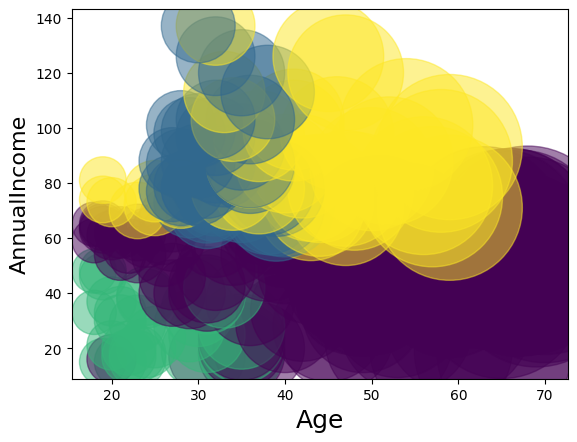

In [143]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 1], X[:, 2], s=area, c=labels.astype(np.float_), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('AnnualIncome', fontsize=16)

plt.show()

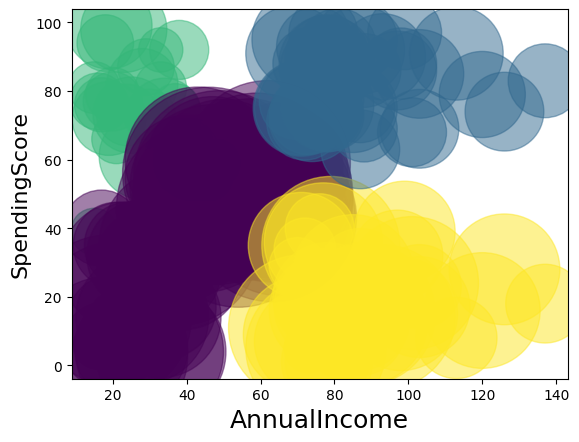

In [144]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 2], X[:, 3], s=area, c=labels.astype(np.float_), alpha=0.5)
plt.xlabel('AnnualIncome', fontsize=18)
plt.ylabel('SpendingScore', fontsize=16)

plt.show()

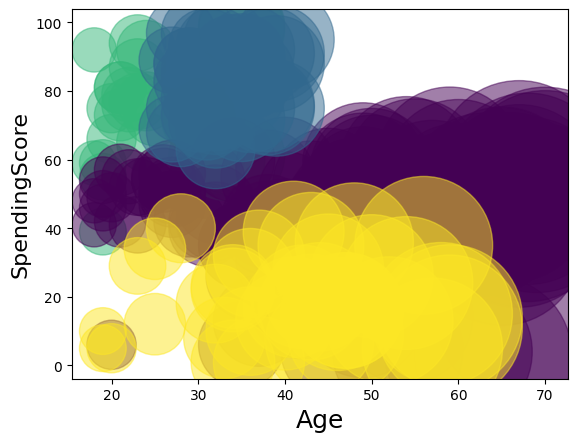

In [145]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float_), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('SpendingScore', fontsize=16)

plt.show()

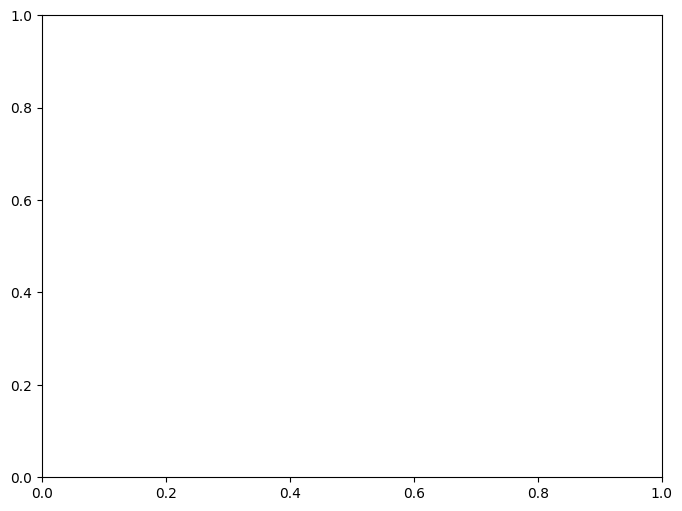

In [146]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.scatter(X[:, 1], X[:, 2], X[:, 3], c= labels.astype(np.float_))
